In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import os

In [7]:
os.chdir('/Users/sahoko/GitHub/Food-insecurity-GP-forecasting/')
country_list = os.listdir('Data/Foini2023/output_data')
#country_list.remove('.DS_Store')
country_list

['Syria', 'Burkina-Faso', 'Yemen', 'Mali', 'Nigeria', 'Niger', 'Cameroon']

In [ ]:
for country in country_list:
    #if (country == 'Burkina-Faso' or country == 'Niger'):
    #    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'-day.csv'
    #else:
    #    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'.csv'
    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'.csv'
    df =  pd.read_csv(file, header=[0,1])
    
    region_list = df.columns.get_level_values(0)[1:].to_list()
    region_list = (list(dict.fromkeys(region_list)))
    column_list= df.columns.get_level_values(1)[1:].to_list()
    column_list = (list(dict.fromkeys(column_list)))
    df_missing = pd.DataFrame(columns=column_list)
    
    for region in region_list:
        ms_ct = len(df) - df[region].describe().loc['count'] 
        df_missing = pd.concat([df_missing, ms_ct.to_frame().T], ignore_index=True)
 
    df_missing.index = region_list    
    df_missing.to_csv('Data/Foini2023/Missing-data-info/Original/'+ country +'-missing.csv')   
    

In [ ]:
df_info_ctry = pd.DataFrame(columns=['startday','lastday','n_days','n_areas'])

for country in country_list:
    file = 'Data/Foini2023/output_data/'+ country +'/' + country +'.csv'    
    df =  pd.read_csv(file, header=[0,1])
    
    region_list = df.columns.get_level_values(0)[1:].to_list()
    column_list= df.columns.get_level_values(1)[1:].to_list()
    region_list = (list(dict.fromkeys(region_list)))
    column_list = (list(dict.fromkeys(column_list)))
    n_areas = len(region_list)
    first_tmp = []
    last_tmp = []
    
    for region in region_list:
        first_tmp.append(df[region]['FCG'].first_valid_index())
        last_tmp.append(df[region]['FCG'].last_valid_index())
        
    first = min(first_tmp)
    last = max(last_tmp)
    first_day = df['AdminStrata']['Indicator'][first]
    last_day = df['AdminStrata']['Indicator'][last]
    n_days =last-first
    new_row = pd.DataFrame({'startday':first_day,'lastday':last_day,'n_days':n_days,'n_areas':n_areas},
                       index=[country])
    df_info_ctry = pd.concat([df_info_ctry, new_row])
    
    df_missing = pd.DataFrame(columns=column_list)
    df_clean = df.iloc[first:last]
    for region in region_list:
        ms_ct = len(df_clean) - df_clean[region].describe().loc['count'] 
        df_missing = pd.concat([df_missing, ms_ct.to_frame().T], ignore_index=True)
    df_missing.index = region_list    
    df_missing.to_csv('Data/Foini2023/Missing-data-info/Cleaned/'+ country +'-missing-clean.csv')   
    
df_info_ctry.to_csv('Data/Foini2023/Missing-data-info/country-info.csv')


In [ ]:
# Choose country from country_list ['Syria', 'Burkina-Faso', 'Yemen', 'Mali', 'Nigeria', 'Niger', 'Cameroon']
country = 'Burkina-Faso'
# Read data
file = 'Data/Foini2023/output_data/'+ country +'/' + country +'.csv'
df = pd.read_csv(file, header=[0,1])

In [ ]:
region_list = df.columns.get_level_values(0)[1:].to_list()
column_list= df.columns.get_level_values(1)[1:].to_list()
region_list = (list(dict.fromkeys(region_list)))
column_list = (list(dict.fromkeys(column_list)))

In [ ]:
df_rain_1m = pd.DataFrame(columns=['Datetime'])
df_rain_1m['Datetime'] = pd.to_datetime(df['AdminStrata']['Indicator'])
for region in region_list:
    df_rain_1m[region] = df[region]['1 Month Anomaly Rainfalls (%)']
df_rain_1m = df_rain_1m.set_index('Datetime')

In [ ]:
ax = df_rain_1m[region_list[0]].iloc[0:100].plot()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot();

In [ ]:
ax = df_rain_1m[region_list[0]].iloc[0:100].plot()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot();

In [ ]:
df_rain_3m = pd.DataFrame(columns=['Datetime'])
df_rain_3m['Datetime'] = pd.to_datetime(df['AdminStrata']['Indicator'])
for region in region_list:
    df_rain_3m[region] = df[region]['3 Months Anomaly Rainfalls (%)']
df_rain_3m = df_rain_3m.set_index('Datetime')

In [ ]:
ax = df_rain_3m[region_list[0:5]].plot()
ax.legend(bbox_to_anchor=(1.0, 1.0))
ax.plot();

### Data exploration by countries

In [288]:
# Choose country from country_list ['Syria', 'Burkina-Faso', 'Yemen', 'Mali', 'Nigeria', 'Niger', 'Cameroon']
country = 'Burkina-Faso'

In [243]:
df_info_ctry = pd.read_csv('Data/Foini2023/Missing-data-info/country-info.csv', index_col=0)
#df_info_ctry.loc['Syria']['startday']
df_info_ctry

,startday,lastday,n_days,n_areas
Syria,2018-08-31,2022-04-01,1309,12
Burkina-Faso,2019-09-08,2022-04-19,954,13
Yemen,2018-07-02,2022-04-17,1385,20
Mali,2019-10-20,2022-04-19,912,7
Nigeria,2019-01-18,2022-04-19,1187,3
Niger,2019-09-29,2020-12-14,442,8
Cameroon,2019-06-30,2022-04-19,1024,10


In [289]:
# Read data
file = 'Data/Foini2023/output_data/'+ country +'/' + country +'.csv'
df = pd.read_csv(file, header=[0,1])

In [290]:
st = df.index[df['AdminStrata']['Indicator']== df_info_ctry.loc[country]['startday']][0]
en = df.index[df['AdminStrata']['Indicator']== df_info_ctry.loc[country]['lastday']][0]
df = df.iloc[st:en]
n_row = len(df)

In [291]:
region_list = df.columns.get_level_values(0)[1:].to_list()
column_list= df.columns.get_level_values(1)[1:].to_list()
region_list = (list(dict.fromkeys(region_list)))
column_list = (list(dict.fromkeys(column_list)))

In [285]:
region_list[7]
df[region_list[7]]

,1 Month Anomaly Rainfalls (%),3 Months Anomaly Rainfalls (%),Area,Code,FCG,Fatalities,Lat,Lon,NDVI,NDVI Anomaly,Population,Rainfalls (mm),Ramadan,Waterways,rCSI
545,34.780708,84.086563,3.836775,20,19.983820,0.0,2.755916,11.575763,0.853372,101.080269,797019,8.136,30.0,20.735266,10.922330
546,NaN,NaN,3.836775,20,19.556610,0.0,2.755916,11.575763,NaN,NaN,797019,NaN,30.0,20.735266,10.688840
547,NaN,NaN,3.836775,20,18.669690,0.0,2.755916,11.575763,NaN,NaN,797019,NaN,30.0,20.735266,10.204080
548,NaN,NaN,3.836775,20,18.055560,0.0,2.755916,11.575763,NaN,NaN,797019,NaN,30.0,20.735266,9.868420
549,NaN,NaN,3.836775,20,20.099790,0.0,2.755916,11.575763,NaN,NaN,797019,NaN,30.0,20.735266,9.622240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,NaN,NaN,3.836775,20,25.757540,0.0,2.755916,11.575763,NaN,NaN,797019,NaN,14.0,20.735266,22.079042
1565,NaN,NaN,3.836775,20,24.078696,0.0,2.755916,11.575763,NaN,NaN,797019,NaN,15.0,20.735266,23.994783
1566,NaN,NaN,3.836775,20,24.897489,NaN,2.755916,11.575763,NaN,NaN,797019,NaN,16.0,20.735266,24.814902
1567,NaN,NaN,3.836775,20,24.933142,NaN,2.755916,11.575763,NaN,NaN,797019,NaN,17.0,20.735266,24.745378


### Correlation matrix and pair (scatter) plot

In [292]:
region_list

['Boucle-Du-Mouhoun',
 'Cascades',
 'Centre',
 'Centre-Est',
 'Centre-Nord',
 'Centre-Ouest',
 'Centre-Sud',
 'Est',
 'Hauts-Bassins',
 'Nord',
 'Plateau-Central',
 'Sahel',
 'Sud-Ouest']

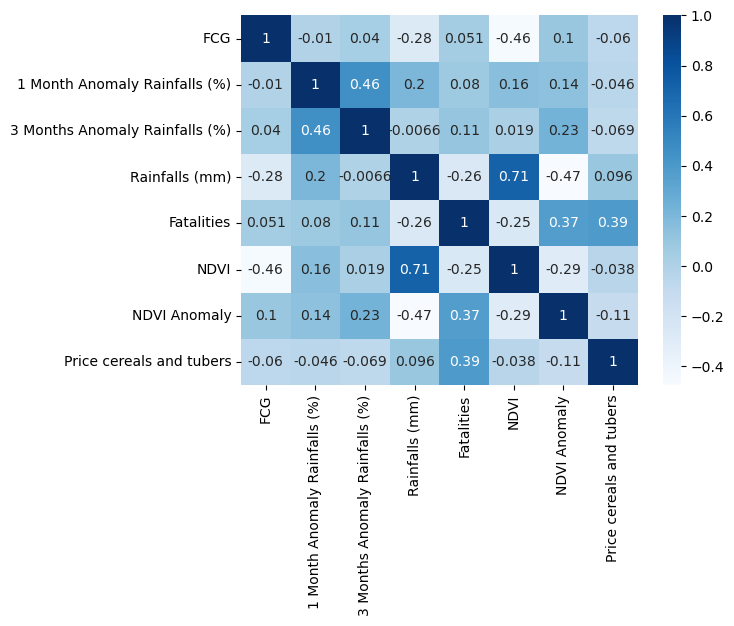

In [305]:
# Choose region
region = region_list[12]
cor = df[region][['FCG','1 Month Anomaly Rainfalls (%)','3 Months Anomaly Rainfalls (%)','Rainfalls (mm)','Fatalities','NDVI','NDVI Anomaly','Price cereals and tubers']].corr()
sns.heatmap(cor,cmap="Blues", annot=True);

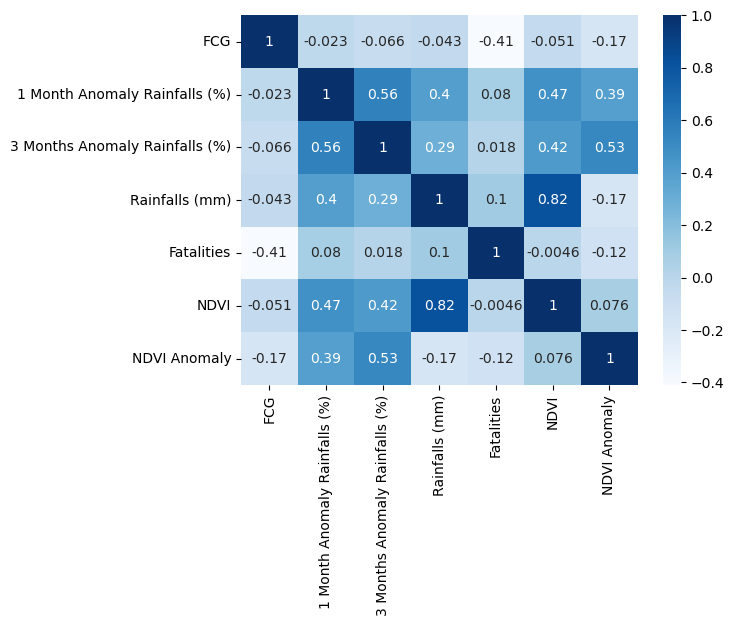

In [287]:
# For cameroon
# Choose region
region = region_list[8]
cor = df[region][['FCG','1 Month Anomaly Rainfalls (%)','3 Months Anomaly Rainfalls (%)','Rainfalls (mm)','Fatalities','NDVI','NDVI Anomaly']].corr()
sns.heatmap(cor,cmap="Blues", annot=True);

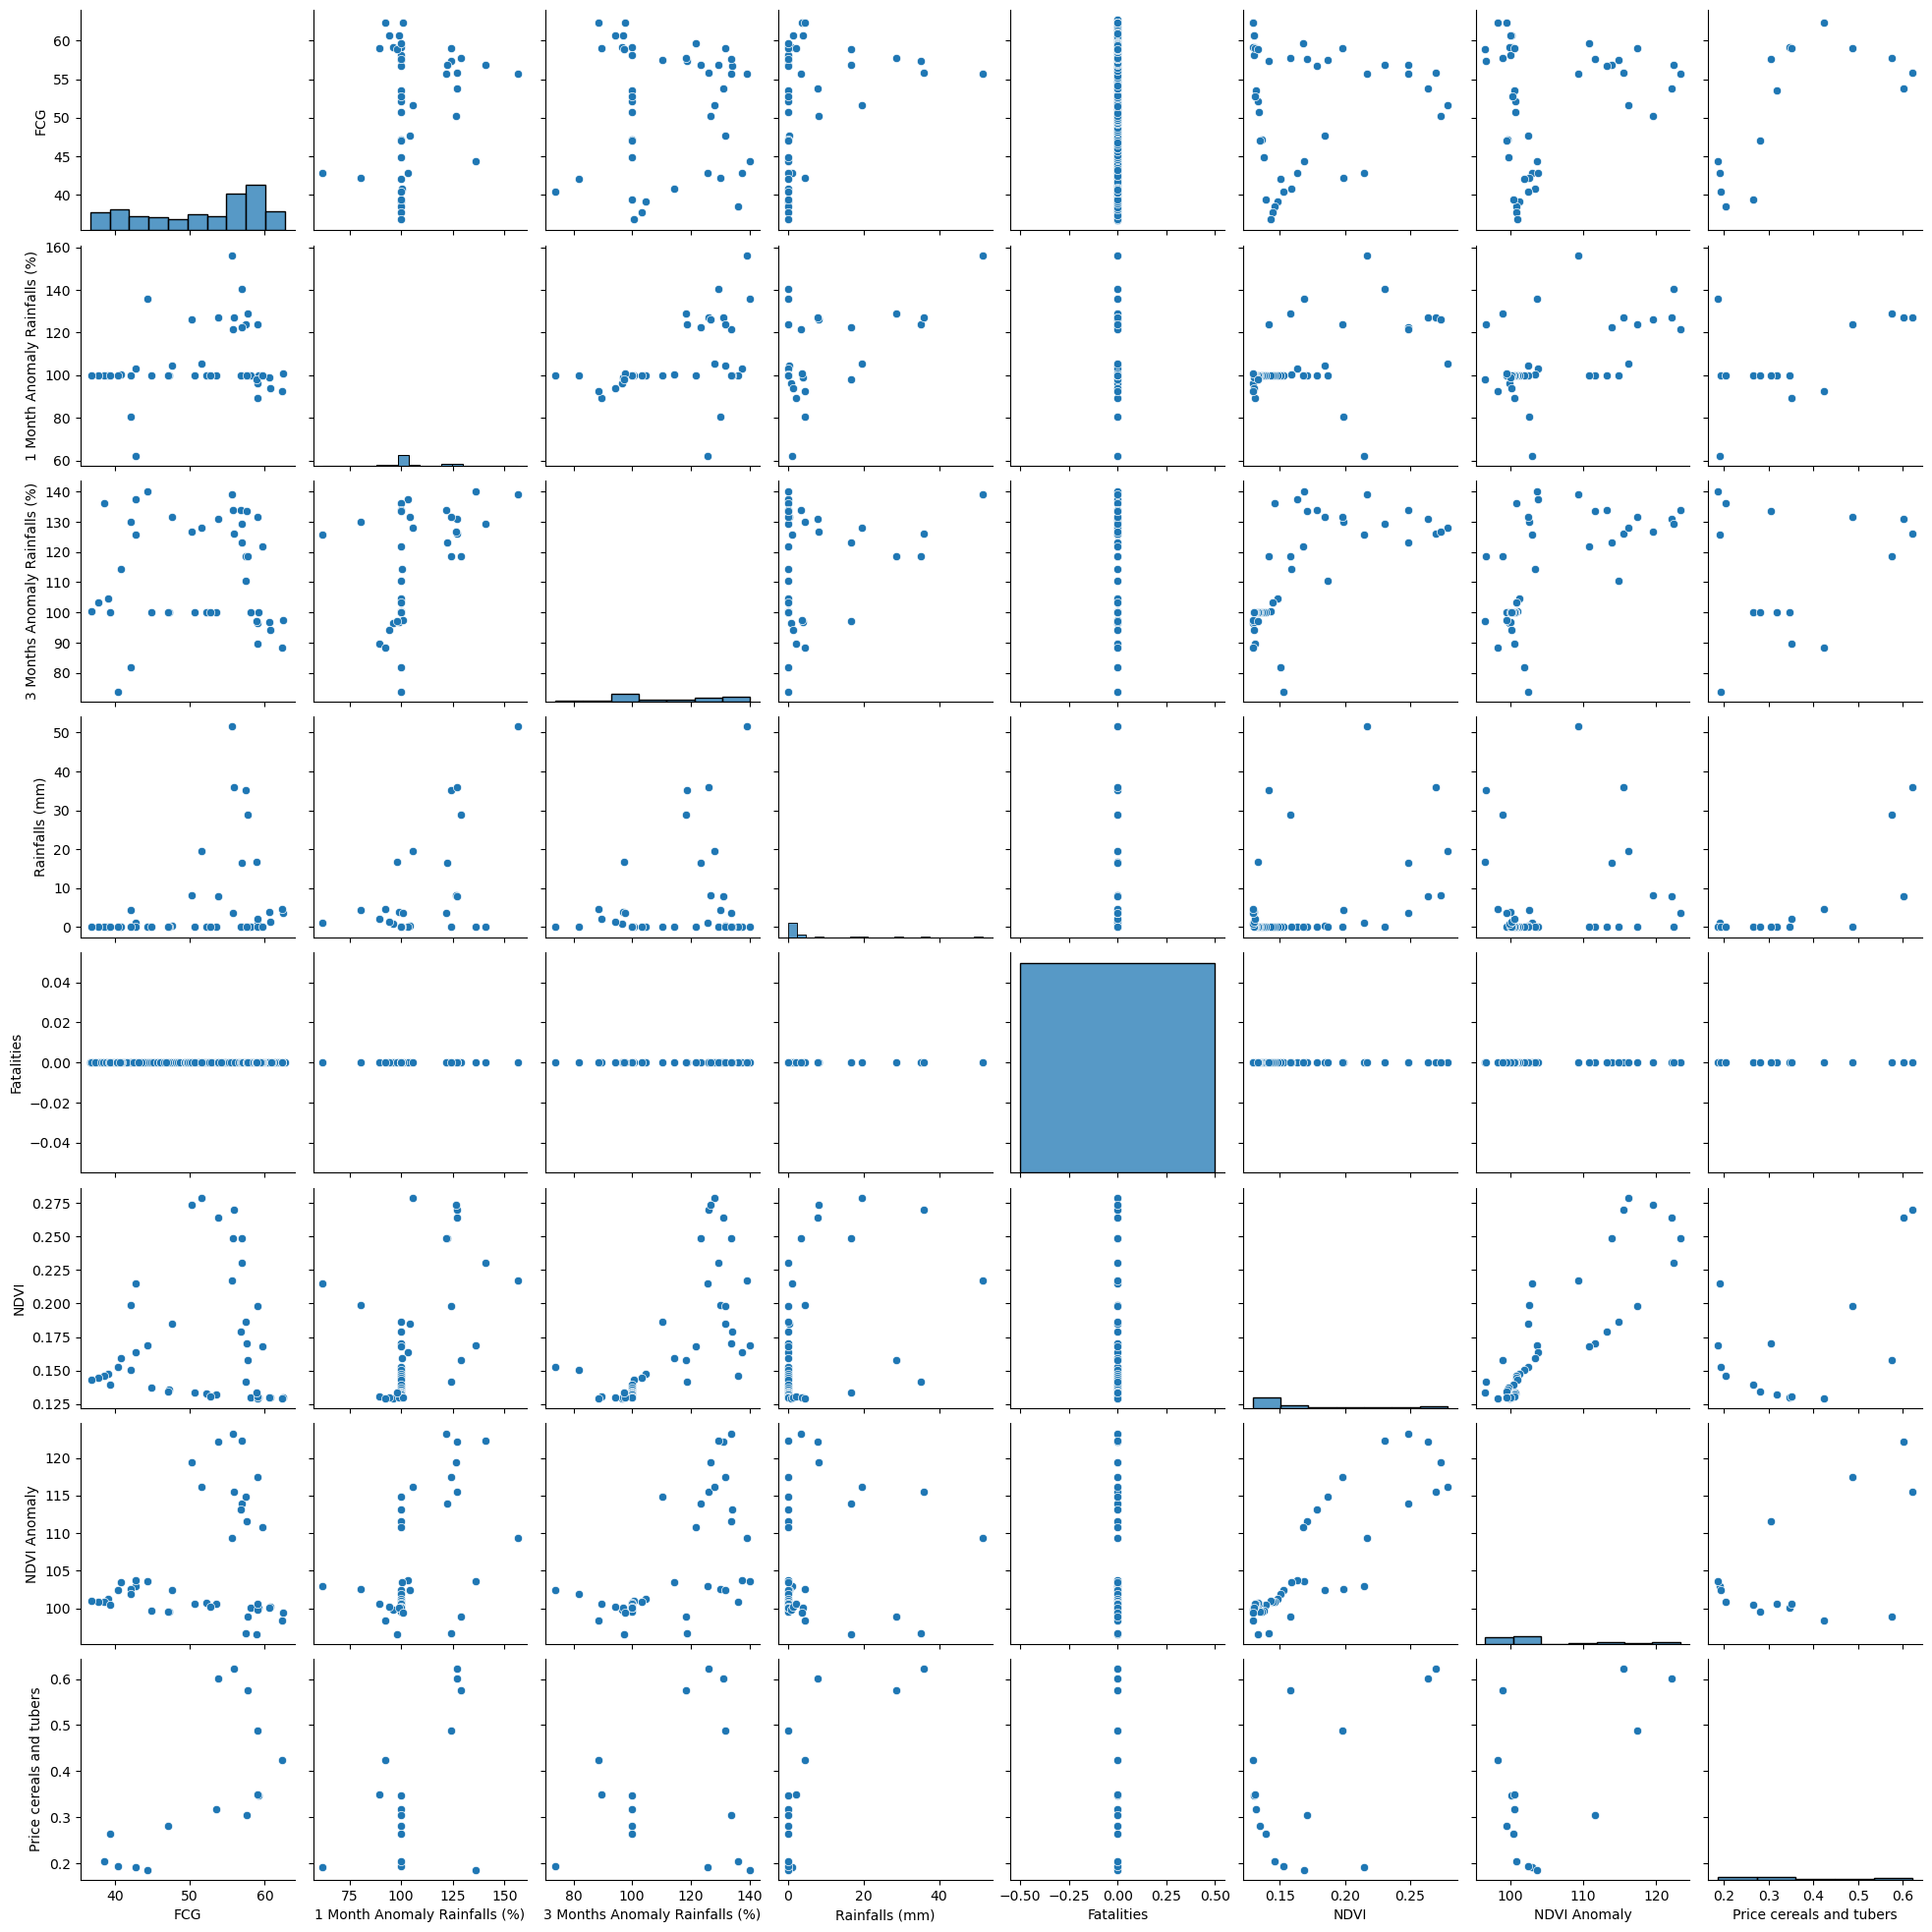

In [259]:
sns.pairplot(df[region][['FCG','1 Month Anomaly Rainfalls (%)','3 Months Anomaly Rainfalls (%)','Rainfalls (mm)','Fatalities','NDVI','NDVI Anomaly','Price cereals and tubers']],  dropna=True);

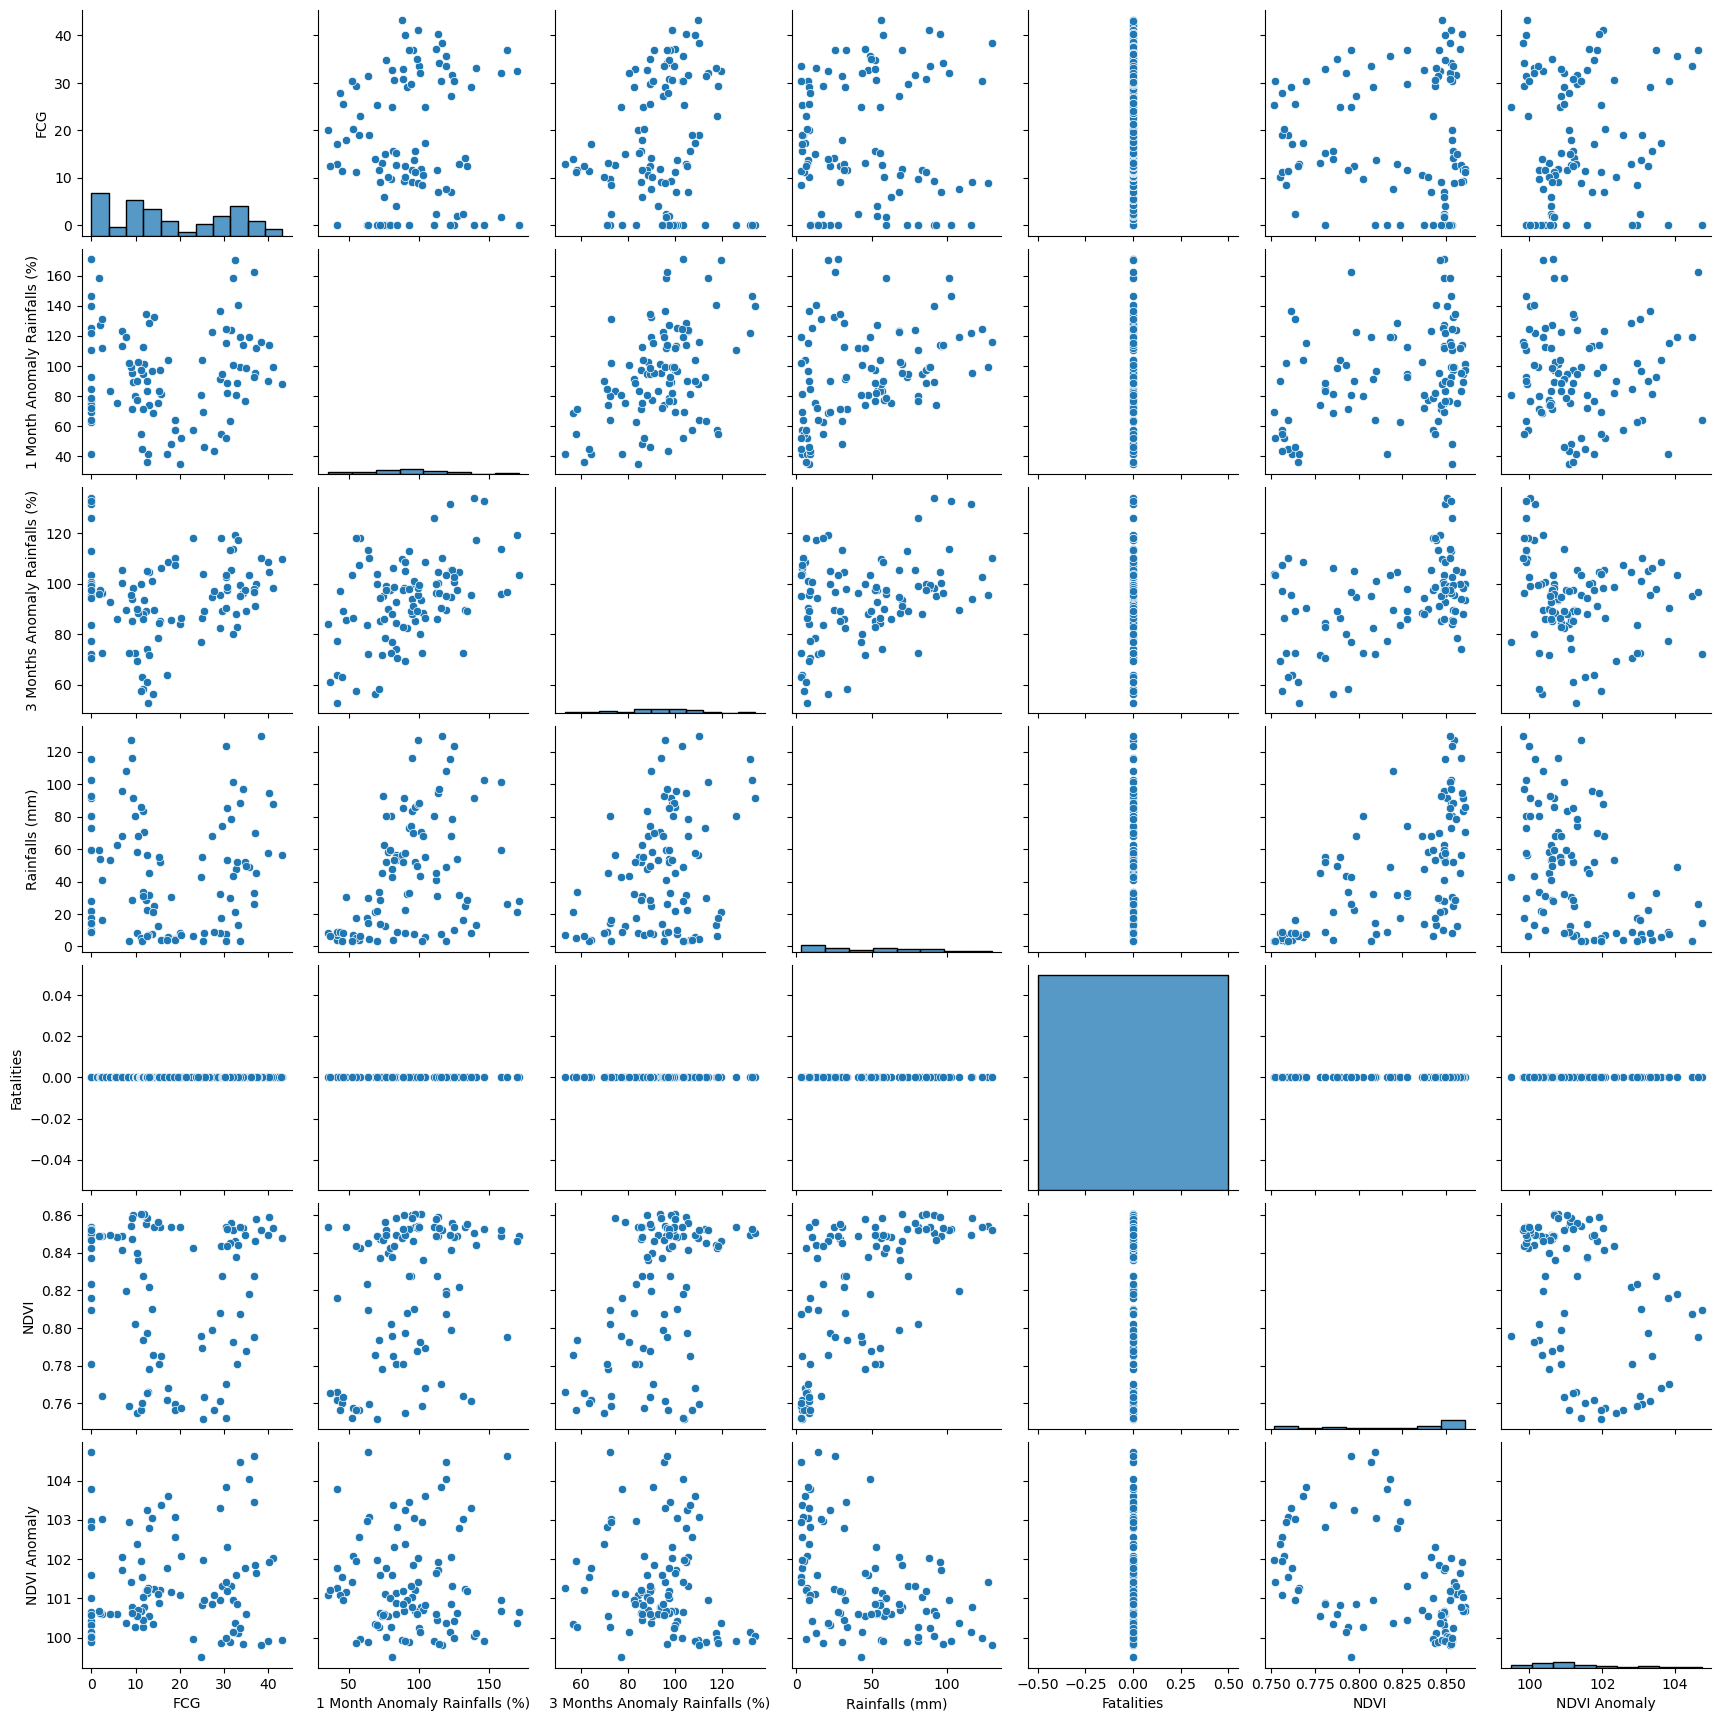

In [286]:
sns.pairplot(df[region][['FCG','1 Month Anomaly Rainfalls (%)','3 Months Anomaly Rainfalls (%)','Rainfalls (mm)','Fatalities','NDVI','NDVI Anomaly']],  dropna=True);

In [136]:
df_long = pd.DataFrame(columns=column_list)
for region in region_list:
    df_long = pd.concat([df_long, df[region]], axis=0)
df_long['region'] = list(np.repeat(region_list,len(df)))
df_long['Datetime'] = list(pd.to_datetime(df['AdminStrata']['Indicator']))*len(region_list)
df_long

,1 Month Anomaly Rainfalls (%),3 Months Anomaly Rainfalls (%),Area,Code,FCG,Fatalities,Lat,Lon,NDVI,NDVI Anomaly,Population,Price cereals and tubers,Rainfalls (mm),Ramadan,Waterways,rCSI,region,Datetime
615,NaN,NaN,2.866733,0,30.921700,4.0,12.535927,-3.488905,NaN,NaN,1816310,NaN,NaN,0.0,9.290487,19.499500,Boucle-Du-Mouhoun,2019-09-08
616,NaN,NaN,2.866733,0,31.103930,4.0,12.535927,-3.488905,NaN,NaN,1816310,NaN,NaN,0.0,9.290487,19.567380,Boucle-Du-Mouhoun,2019-09-09
617,112.112436,107.023646,2.866733,0,32.030300,4.0,12.535927,-3.488905,0.598706,97.420785,1816310,NaN,69.165,0.0,9.290487,20.400680,Boucle-Du-Mouhoun,2019-09-10
618,NaN,NaN,2.866733,0,32.167300,4.0,12.535927,-3.488905,NaN,NaN,1816310,NaN,NaN,0.0,9.290487,20.405580,Boucle-Du-Mouhoun,2019-09-11
619,NaN,NaN,2.866733,0,31.770050,4.0,12.535927,-3.488905,NaN,NaN,1816310,NaN,NaN,0.0,9.290487,19.238530,Boucle-Du-Mouhoun,2019-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,NaN,NaN,1.363722,12,45.410901,3.0,10.475215,-3.237191,NaN,NaN,796535,NaN,NaN,14.0,6.444829,14.366029,Sud-Ouest,2022-04-14
1565,NaN,NaN,1.363722,12,44.728667,3.0,10.475215,-3.237191,NaN,NaN,796535,NaN,NaN,15.0,6.444829,12.660446,Sud-Ouest,2022-04-15
1566,NaN,NaN,1.363722,12,42.369553,NaN,10.475215,-3.237191,NaN,NaN,796535,NaN,NaN,16.0,6.444829,12.285583,Sud-Ouest,2022-04-16
1567,NaN,NaN,1.363722,12,42.755724,NaN,10.475215,-3.237191,NaN,NaN,796535,NaN,NaN,17.0,6.444829,12.757992,Sud-Ouest,2022-04-17


<Axes: >

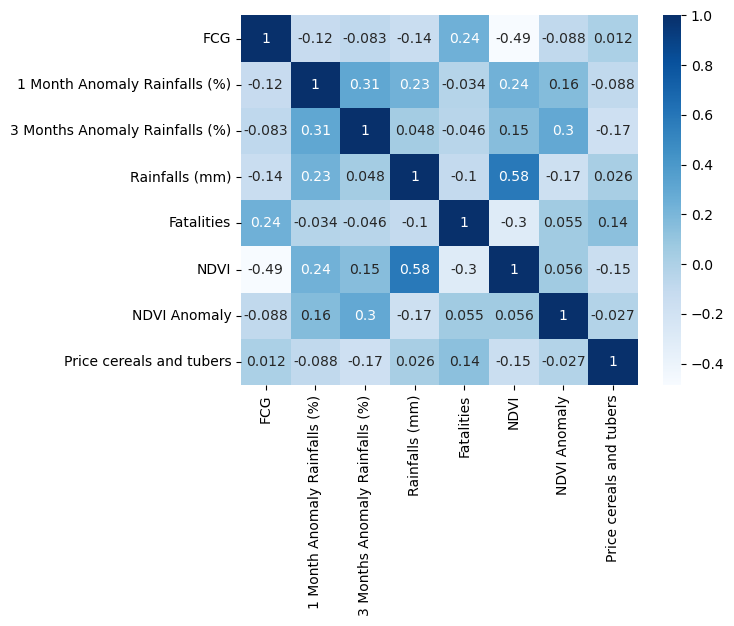

In [106]:
cor = df_long[['FCG','1 Month Anomaly Rainfalls (%)','3 Months Anomaly Rainfalls (%)','Rainfalls (mm)','Fatalities','NDVI','NDVI Anomaly','Price cereals and tubers']].corr()
sns.heatmap(cor,cmap="Blues", annot=True)

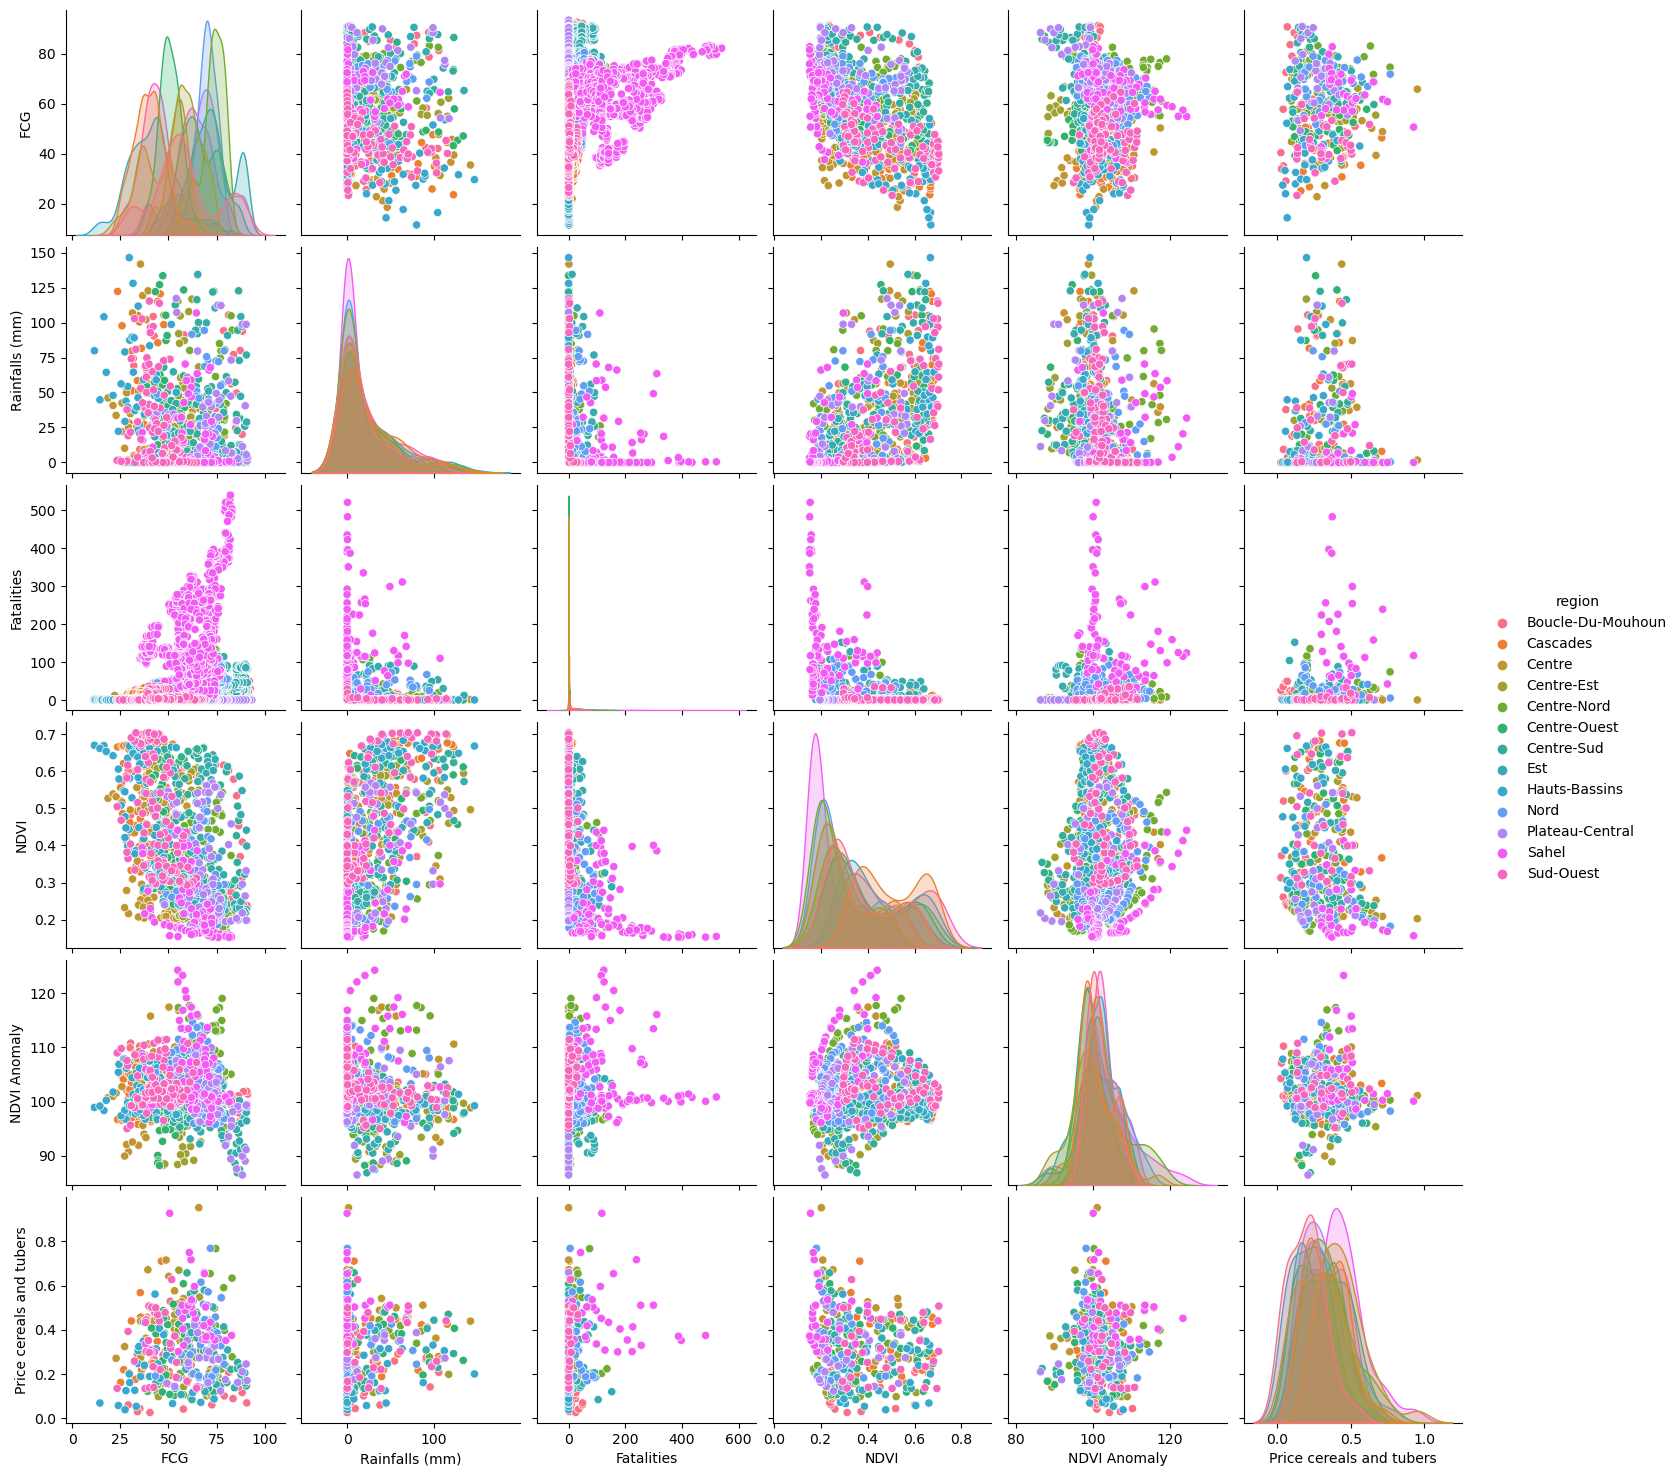

In [86]:
sns.pairplot(df_long[['FCG','Rainfalls (mm)','Fatalities','NDVI','NDVI Anomaly','Price cereals and tubers','region']], hue='region', dropna=True);